In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("wellbeing_and_lifestyle_data_kaggle.csv")


In [3]:
data.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [4]:
data.columns=data.columns.str.lower()

In [5]:
data.shape

(15972, 24)

In [6]:
data.dtypes

timestamp                   object
fruits_veggies               int64
daily_stress                object
places_visited               int64
core_circle                  int64
supporting_others            int64
social_network               int64
achievement                  int64
donation                     int64
bmi_range                    int64
todo_completed               int64
flow                         int64
daily_steps                  int64
live_vision                  int64
sleep_hours                  int64
lost_vacation                int64
daily_shouting               int64
sufficient_income            int64
personal_awards              int64
time_for_passion             int64
weekly_meditation            int64
age                         object
gender                      object
work_life_balance_score    float64
dtype: object

In [7]:
data.daily_stress.apply(lambda x: x.isnumeric())

0        True
1        True
2        True
3        True
4        True
         ... 
15967    True
15968    True
15969    True
15970    True
15971    True
Name: daily_stress, Length: 15972, dtype: bool

In [8]:
np.sum(data.isna())

timestamp                  0
fruits_veggies             0
daily_stress               0
places_visited             0
core_circle                0
supporting_others          0
social_network             0
achievement                0
donation                   0
bmi_range                  0
todo_completed             0
flow                       0
daily_steps                0
live_vision                0
sleep_hours                0
lost_vacation              0
daily_shouting             0
sufficient_income          0
personal_awards            0
time_for_passion           0
weekly_meditation          0
age                        0
gender                     0
work_life_balance_score    0
dtype: int64

In [9]:
data=data.drop(['timestamp','age','gender','work_life_balance_score'], axis = 1)

In [10]:
data.head(5)

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
0,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5
1,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6
2,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3
3,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0
4,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5


In [11]:
data[data['daily_stress']=='1/1/2000']

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
10005,3,1/1/2000,1,2,10,10,5,5,2,6,8,6,3,6,10,1,2,10,8,2


In [12]:
data= data.drop(index= 10005)

In [13]:
data.shape

(15971, 20)

In [14]:
data.daily_stress= data.daily_stress.astype(int)

In [15]:
data.daily_stress.dtypes

dtype('int32')

In [16]:
data.apply(['min','max'])

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
min,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
max,5,5,10,10,10,10,10,5,2,10,10,10,10,10,10,10,2,10,10,10


Text(0, 0.5, 'average stress')

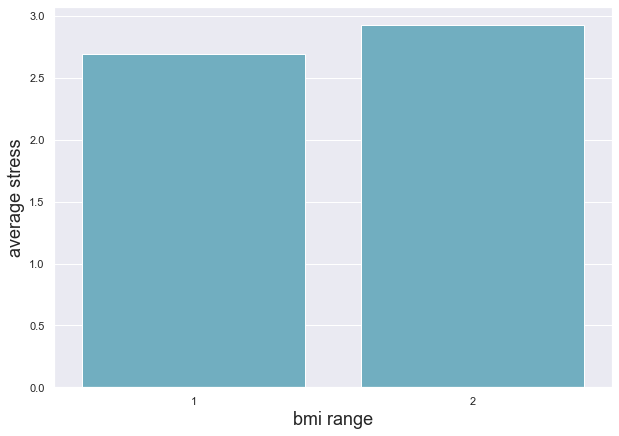

In [17]:
bmi_data=data[['bmi_range','daily_stress']].groupby('bmi_range').agg('mean')
bmi_data['bmi_range']=bmi_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="bmi_range",y = "daily_stress", data= bmi_data, color='c')
plt.xlabel('bmi range',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [18]:
data[['bmi_range','daily_stress']].groupby('bmi_range').agg('mean')

,daily_stress
bmi_range,
1,2.696802
2,2.927874


Text(0, 0.5, 'average stress')

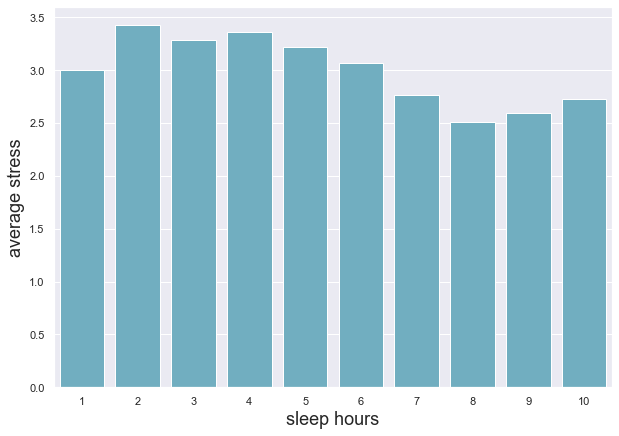

In [19]:
sleep_data= data[['sleep_hours','daily_stress']].groupby('sleep_hours').agg('mean')
sleep_data['sleep_hours']=sleep_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="sleep_hours",y = "daily_stress", data= sleep_data, color='c')
#ax.set(xlabel='bmi range', ylabel='average stress') 
plt.xlabel('sleep hours',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [20]:
data[['sleep_hours','daily_stress']].groupby('sleep_hours').count()

,daily_stress
sleep_hours,
1,18
2,21
3,49
4,252
5,1025
6,3396
7,5566
8,4324
9,987


Text(0, 0.5, 'average stress')

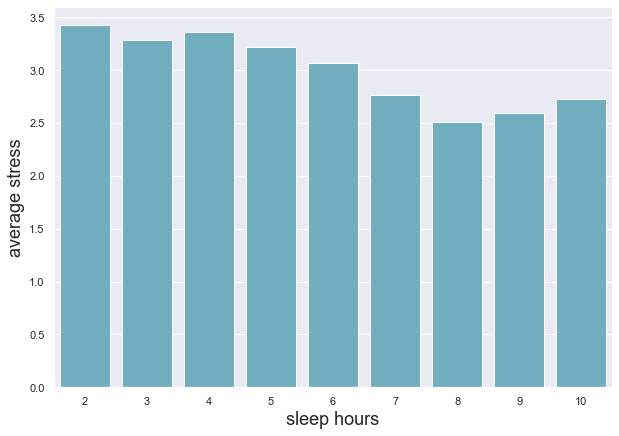

In [21]:
modified_sleep_data= data[['sleep_hours','daily_stress']].loc[data['sleep_hours'] != 1].groupby('sleep_hours').agg('mean')
modified_sleep_data['sleep_hours']= modified_sleep_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="sleep_hours",y = "daily_stress", data= modified_sleep_data, color='c')
plt.xlabel('sleep hours',fontsize =18)
plt.ylabel('average stress',fontsize=18)




In [22]:
modified_sleep_data= data[['sleep_hours','daily_stress']].loc[data['sleep_hours'] != 1].groupby('sleep_hours').agg('mean')
modified_sleep_data

,daily_stress
sleep_hours,
2,3.428571
3,3.285714
4,3.357143
5,3.222439
6,3.072733
7,2.763924
8,2.512026
9,2.593718
10,2.729730


Text(0, 0.5, 'average stress')

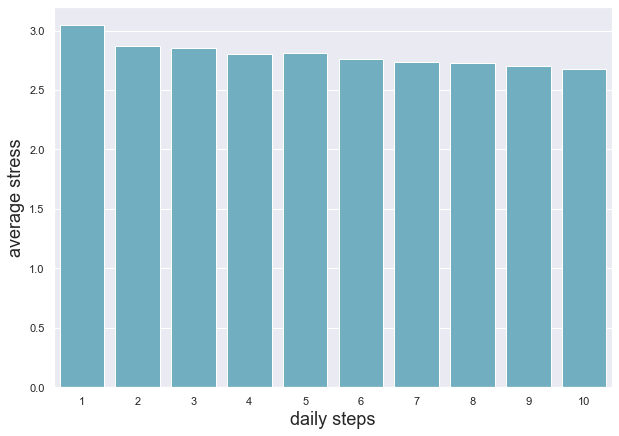

In [23]:
steps_data = data[['daily_steps','daily_stress']].groupby('daily_steps').agg('mean')
steps_data['daily_steps']=steps_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="daily_steps",y = "daily_stress", data= steps_data, color='c')
plt.xlabel('daily steps',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [24]:
data[['daily_steps','daily_stress']].groupby('daily_steps').agg('mean')

,daily_stress
daily_steps,
1,3.047162
2,2.868961
3,2.857052
4,2.801197
5,2.814901
6,2.756418
7,2.735849
8,2.727155
9,2.702550


Text(0, 0.5, 'average stress')

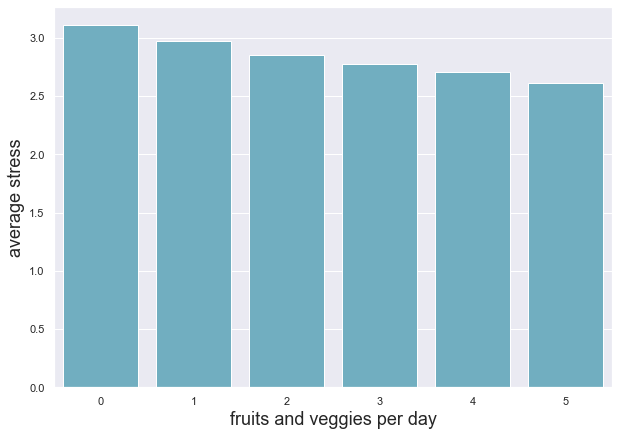

In [25]:
fruits_veggies_data= data[['fruits_veggies','daily_stress']].groupby('fruits_veggies').agg('mean')
fruits_veggies_data['fruits_veggies']=fruits_veggies_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="fruits_veggies",y = "daily_stress", data= fruits_veggies_data, color='c')
plt.xlabel('fruits and veggies per day',fontsize =18)
plt.ylabel('average stress',fontsize=18)

In [26]:
data[['fruits_veggies','daily_stress']].groupby('fruits_veggies').agg('mean')#.plot.bar(color='b')

,daily_stress
fruits_veggies,
0,3.110507
1,2.969434
2,2.856303
3,2.778908
4,2.705998
5,2.609997


In [27]:
correlation_data=data[['bmi_range','fruits_veggies','daily_steps','sleep_hours','daily_stress','social_network', 'places_visited','core_circle','supporting_others','donation','time_for_passion','sufficient_income','weekly_meditation']]

In [28]:
correlation_data= correlation_data.corr(method='pearson')
correlation_data

,bmi_range,fruits_veggies,daily_steps,sleep_hours,daily_stress,social_network,places_visited,core_circle,supporting_others,donation,time_for_passion,sufficient_income,weekly_meditation
bmi_range,1.000000,-0.092976,-0.131465,-0.098156,0.083110,0.019843,-0.108054,-0.025965,0.038558,0.064543,-0.006237,-0.011863,-0.078189
fruits_veggies,-0.092976,1.000000,0.251213,0.103633,-0.094535,0.106941,0.254906,0.157785,0.204469,0.199462,0.164581,0.148239,0.196104
daily_steps,-0.131465,0.251213,1.000000,0.009218,-0.065511,0.215799,0.196128,0.148021,0.147592,0.113415,0.139918,0.103871,0.148154
sleep_hours,-0.098156,0.103633,0.009218,1.000000,-0.157037,-0.029662,0.127251,0.066325,0.007125,-0.001343,0.061657,0.045341,0.163147
daily_stress,0.083110,-0.094535,-0.065511,-0.157037,1.000000,0.020930,-0.134857,-0.120238,-0.029852,-0.037721,-0.158141,-0.144573,-0.218660
social_network,0.019843,0.106941,0.215799,-0.029662,0.020930,1.000000,0.149358,0.308773,0.316200,0.156792,0.200535,0.123638,-0.006609
places_visited,-0.108054,0.254906,0.196128,0.127251,-0.134857,0.149358,1.000000,0.255803,0.237981,0.204597,0.177892,0.176672,0.209254
core_circle,-0.025965,0.157785,0.148021,0.066325,-0.120238,0.308773,0.255803,1.000000,0.337859,0.221875,0.227796,0.123117,0.105240
supporting_others,0.038558,0.204469,0.147592,0.007125,-0.029852,0.316200,0.237981,0.337859,1.000000,0.393149,0.327750,0.113340,0.144307
donation,0.064543,0.199462,0.113415,-0.001343,-0.037721,0.156792,0.204597,0.221875,0.393149,1.000000,0.193055,0.120585,0.144197


In [29]:
correlation_data['daily_stress'].sort_values(ascending=False)

daily_stress         1.000000
bmi_range            0.083110
social_network       0.020930
supporting_others   -0.029852
donation            -0.037721
daily_steps         -0.065511
fruits_veggies      -0.094535
core_circle         -0.120238
places_visited      -0.134857
sufficient_income   -0.144573
sleep_hours         -0.157037
time_for_passion    -0.158141
weekly_meditation   -0.218660
Name: daily_stress, dtype: float64

[Text(0, 0.5, 'bmi_range'),
 Text(0, 1.5, 'fruits_veggies'),
 Text(0, 2.5, 'daily_steps'),
 Text(0, 3.5, 'sleep_hours'),
 Text(0, 4.5, 'daily_stress'),
 Text(0, 5.5, 'social_network'),
 Text(0, 6.5, 'places_visited'),
 Text(0, 7.5, 'core_circle'),
 Text(0, 8.5, 'supporting_others'),
 Text(0, 9.5, 'donation'),
 Text(0, 10.5, 'time_for_passion'),
 Text(0, 11.5, 'sufficient_income'),
 Text(0, 12.5, 'weekly_meditation')]

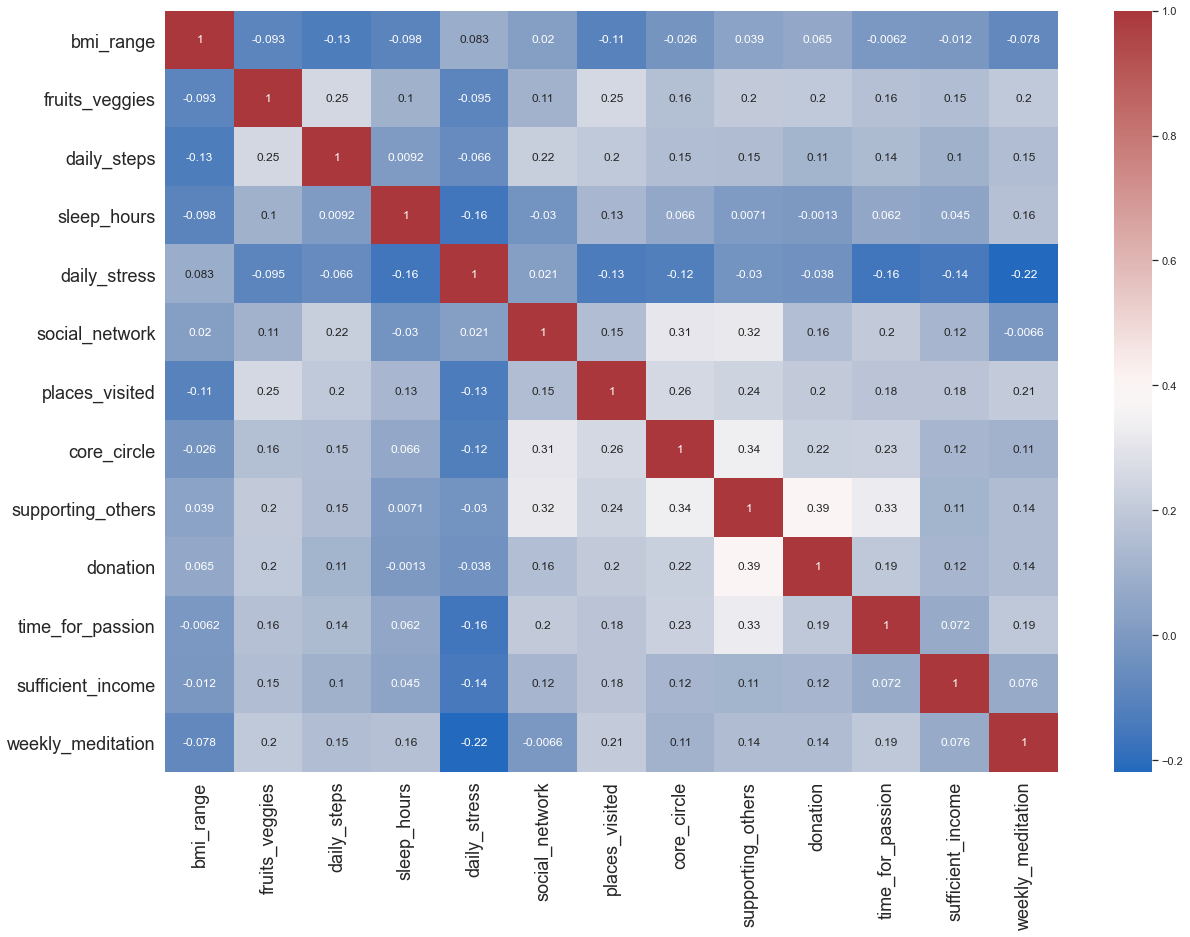

In [30]:
plt.figure(figsize=(20,14))
heatmap= sns.heatmap(correlation_data, annot = True, cmap= "vlag")
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)

Text(0, 0.5, 'average stress')

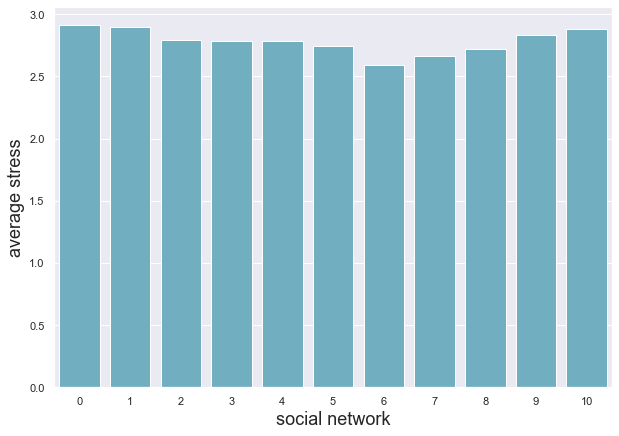

In [31]:
social_network_data= data[['social_network','daily_stress']].groupby('social_network').agg('mean')
social_network_data['social_network']=social_network_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="social_network",y = "daily_stress", data= social_network_data, color='c')
plt.xlabel('social network',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [32]:
social_network_data= data[['social_network','daily_stress']].groupby('social_network').agg('mean')
social_network_data

,daily_stress
social_network,
0,2.913793
1,2.895683
2,2.791297
3,2.782172
4,2.785256
5,2.746862
6,2.592289
7,2.664609
8,2.720079


Text(0, 0.5, 'average stress')

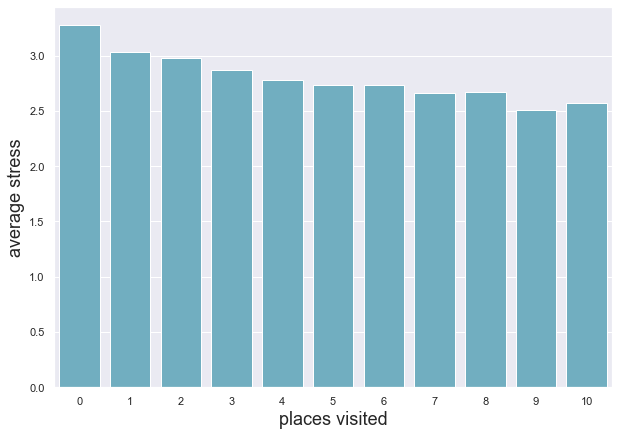

In [33]:
places_visited_data=data[['places_visited','daily_stress']].groupby('places_visited').agg('mean')
places_visited_data['places_visited']= places_visited_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="places_visited",y = "daily_stress", data= places_visited_data, color='c')
plt.xlabel('places visited',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [34]:
places_visited_data=data[['places_visited','daily_stress']].groupby('places_visited').agg('mean')
places_visited_data

,daily_stress
places_visited,
0,3.277559
1,3.032748
2,2.981533
3,2.869022
4,2.777112
5,2.732009
6,2.729754
7,2.660592
8,2.666288


Text(0, 0.5, 'average stress')

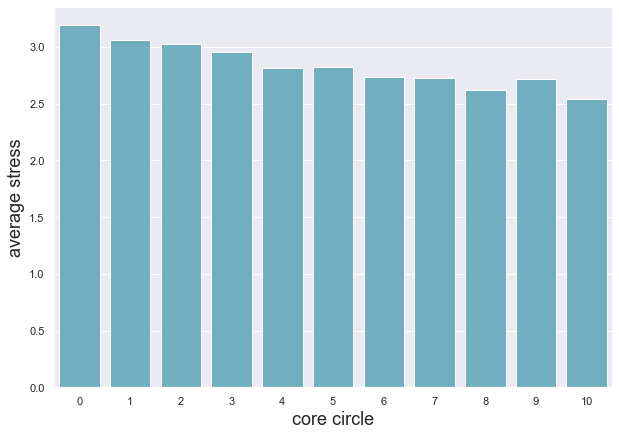

In [35]:
core_circle_data= data[['core_circle','daily_stress']].groupby('core_circle').agg('mean')#.plot.bar(color='b')
core_circle_data['core_circle']= core_circle_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="core_circle",y = "daily_stress", data= core_circle_data, color='c')
plt.xlabel('core circle',fontsize =18)
plt.ylabel('average stress',fontsize=18)


In [36]:
core_circle_data= data[['core_circle','daily_stress']].groupby('core_circle').agg('mean')
core_circle_data


,daily_stress
core_circle,
0,3.195513
1,3.063978
2,3.023651
3,2.957754
4,2.813110
5,2.825726
6,2.733843
7,2.723050
8,2.625688


In [37]:
supporting_others_data = data[['supporting_others','daily_stress']].groupby('supporting_others').agg('mean')
supporting_others_data

,daily_stress
supporting_others,
0,2.897297
1,2.859570
2,2.855964
3,2.792371
4,2.741191
5,2.822977
6,2.848079
7,2.819563
8,2.692475


Text(0, 0.5, 'average stress')

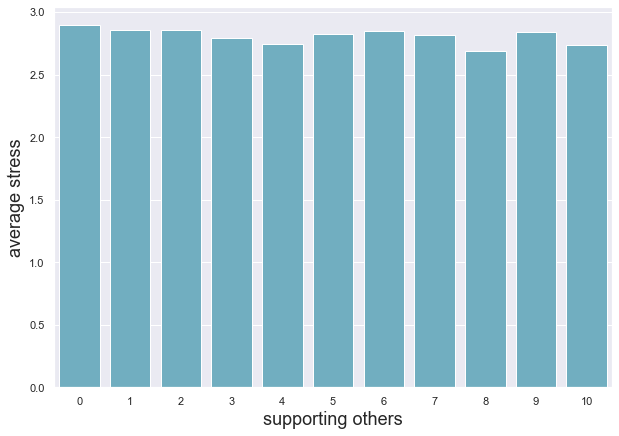

In [38]:
supporting_others_data = data[['supporting_others','daily_stress']].groupby('supporting_others').agg('mean')
supporting_others_data['supporting_others']= supporting_others_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="supporting_others",y = "daily_stress", data= supporting_others_data, color='c')
plt.xlabel('supporting others',fontsize =18)
plt.ylabel('average stress',fontsize=18)

In [39]:
donation_data=data[['donation','daily_stress']].groupby('donation').agg('mean')
donation_data

,daily_stress
donation,
0,2.868000
1,2.846327
2,2.791552
3,2.803167
4,2.744615
5,2.728571


Text(0, 0.5, 'average stress')

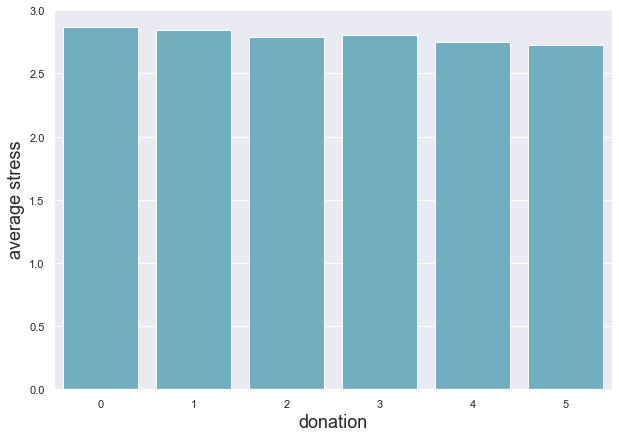

In [40]:
donation_data=data[['donation','daily_stress']].groupby('donation').agg('mean')
donation_data['donation']= donation_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="donation",y = "daily_stress", data= donation_data, color='c')
plt.xlabel('donation',fontsize =18)
plt.ylabel('average stress',fontsize=18)

In [41]:
passion_data= data[['time_for_passion','daily_stress']].groupby('time_for_passion').agg('mean')
passion_data

,daily_stress
time_for_passion,
0,3.341681
1,2.977169
2,2.796836
3,2.712029
4,2.615691
5,2.558177
6,2.556112
7,2.562205
8,2.509392


Text(0, 0.5, 'average stress')

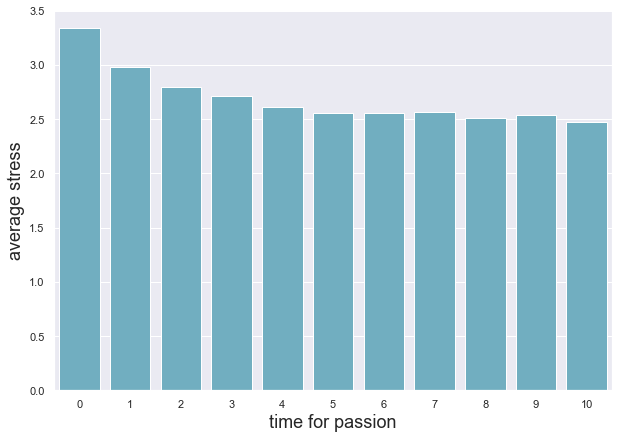

In [42]:
passion_data= data[['time_for_passion','daily_stress']].groupby('time_for_passion').agg('mean')
passion_data['time_for_passion']= passion_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="time_for_passion",y = "daily_stress", data= passion_data, color='c')
plt.xlabel('time for passion',fontsize =18)
plt.ylabel('average stress',fontsize=18)

In [43]:
income_data= data[['sufficient_income','daily_stress']].groupby('sufficient_income').agg('mean')
income_data

,daily_stress
sufficient_income,
1,3.115962
2,2.671105


Text(0, 0.5, 'average stress')

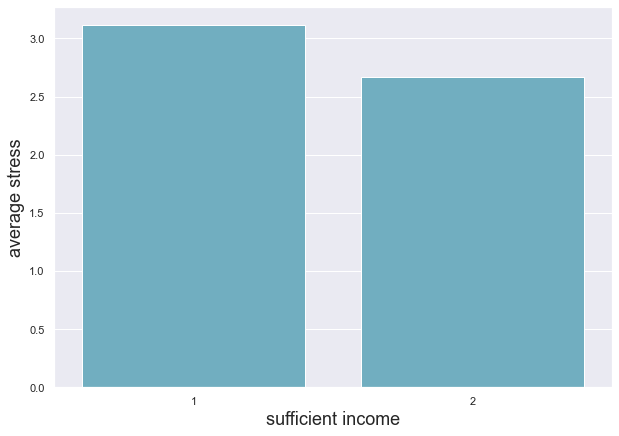

In [44]:
income_data['sufficient_income']= income_data.index
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot( x="sufficient_income",y = "daily_stress", data= income_data, color='c')
plt.xlabel('sufficient income',fontsize =18)
plt.ylabel('average stress',fontsize=18)

In [45]:
meditation_data= data[['weekly_meditation','daily_stress']].groupby('weekly_meditation').agg('mean')
meditation_data

,daily_stress
weekly_meditation,
0,3.646465
1,3.407989
2,3.237522
3,3.100874
4,2.993893
5,2.871017
6,2.740173
7,2.664615
8,2.502518


Text(0, 0.5, 'average stress')

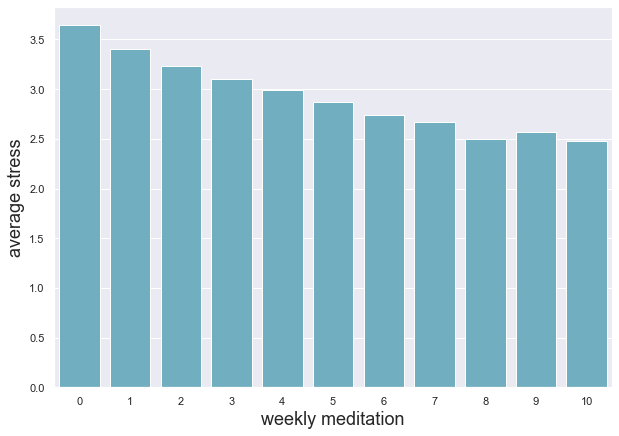

In [46]:
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
meditation_data['weekly_meditation']= meditation_data.index
sns.barplot( x="weekly_meditation",y = "daily_stress", data= meditation_data, color='c')
plt.xlabel('weekly meditation',fontsize =18)
plt.ylabel('average stress',fontsize=18)